In [1]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import Angle
Gaia.ROW_LIMIT = -1

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'CMU Serif'
rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', unicode_minus=False)

In [83]:
coord = SkyCoord("01h33m50.8965749232s +30d39m36.630403128s", frame='icrs')
width = u.Quantity(30, u.arcmin)
r = Gaia.query_object_async(coordinate=coord, width=width, height=width)

INFO: Query finished. [astroquery.utils.tap.core]


In [84]:
r

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object
6.936115075062498e-06,1635721458409799680,Gaia DR2 303379863975504512,303379863975504512,1130804978,2015.5,23.462072211377286,0.8681637277920072,30.660178937676857,0.869345715411961,--,--,--,--,--,--,--,0.21097109,--,--,--,--,--,--,--,--,--,108,0,108,0,179.85352,84241.805,6.004233791997333,5130.5071496494475,3,False,0.027359575,--,--,0.048996035,13,9,1.8196189,0,13,False,114,40625.337161998264,257.3588596607142,157.85483,14.166373,13,30381.96973060214,279.15293530048694,108.83629,14.144849,12,44300.464777022615,126.2461580464162,350.90546,13.145899,1.8383216,0,0.99895,-0.02152443,1.0204744,--,--,0,--,--,--,NOT_AVAILABLE,133.61018988873795,-31.330677405709753,33.23573359583912,19.367927545939537,132001,5095.6333,4284.4497,6938.0,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=http%3A%2F%2Fgeadata.esac.esa.int%2Fdata-server%2Fdatalink%2Flinks%3FID%3D303379863975504512,
0.0007870461797053082,1635721458409799680,Gaia DR2 303379863975505152,303379863975505152,1438280298,2015.5,23.462371639926165,3.548711855542034,30.659429519535117,3.3852802990290685,--,--,--,--,--,--,--,0.07052571,--,--,--,--,--,--,--,--,--,71,0,68,3,45.488075,3186.1545,18.08683357206579,191.2362852018374,3,False,0.0028302728,--,

In [85]:
g_max = np.max(r['phot_g_mean_mag'])
g_min = np.min(r['phot_g_mean_mag'])

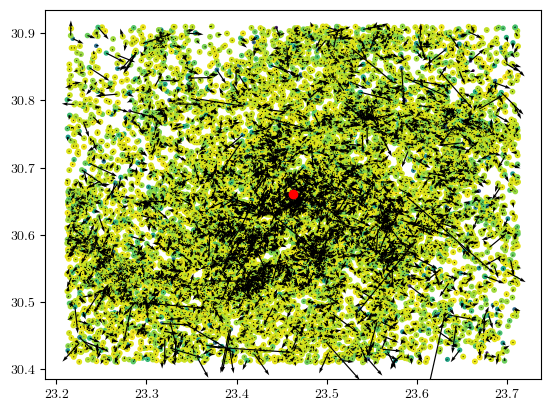

In [86]:
ra0 = Angle("01h33m50.8965749232s")
dec0 = Angle("+30d39m36.630403128s")
fig, ax = plt.subplots(1, 1)
ax.scatter(r['ra'], r['dec'], s=1+10*(r['phot_g_mean_mag'] - g_min)/(g_max - g_min), c=(r['phot_g_mean_mag'] - g_min)/(g_max - g_min))
#plt.quiver(np.array(r['ra'][mask]), np.array(r['dec'][mask]), np.array(r['pmra'][mask]), np.array(r['pmdec'][mask]))
ax.quiver(r['ra'].filled(0), r['dec'].filled(0), r['pmra'].filled(0), r['pmdec'].filled(0))
ax.scatter(ra0.to(u.deg), dec0, c='red')
fig.savefig("quiver.png", dpi=300)
plt.show()

In [135]:
r.sort('phot_g_mean_mag')
_100stars = r[:100]
_100stars

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object
0.25213131005702133,1635721458409799680,Gaia DR2 303388694428195712,303388694428195712,1075908142,2015.5,23.66246573278732,0.04031521199945799,30.84433308423631,0.031163579932135366,1.3208782278205078,0.04007370188262214,32.961224,-4.25351159251003,0.08979699597335528,-1.7039489768711893,0.07349795069294537,0.01588172,0.2906483,-0.09790054,0.03489566,0.007742159,0.04248607,-0.0067389137,-0.08776548,-0.009618043,0.08271003,116,116,113,3,6.1119504,223.9466,0.0,0.0,31,True,318.21454,1.5312351677289702,0.013156267666376351,-0.05469218,13,10,0.057950195,0,15,False,108,2139030.50627082,944.8574804568112,2263.8657,9.8628235,13,937734.1589950705,1058.2565905233719,886.1123,10.421188,14,1686781.0929131345,1911.684649553044,882.3532,9.194273,1.2269648,0,1.2269154,0.55836487,0.6685505,-46.98751430450075,0.46597306457445675,4,5000.0,4.5,0.0,NOT_AVAILABLE,133.76615675004092,-31.116710144928945,33.47962893998805,19.471183045850644,100001,4845.74,4755.88,4953.532,0.0205,0.0056,0.0971,0.009,0.0029,0.0887,200111,10.567703,10.112787,10.97082,55.47489,53.015675,57.93411,https://gea.esac.esa.int/data-server/datalink/links?ID=http%3A%2F%2Fgeadata.esac.esa.int%2Fdata-server%2Fdatalink%2Flinks%3FID%3D303388694428195712,
0.30006328428171825,1635721458409799680,

In [88]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1
cat_names = ['2MASS', 'MSX', 'WISE', 'PanStarrs']
cats = []
for i in range(len(cat_names)):
    cats.append(Vizier.query_region(coord, radius=width*np.sqrt(2), catalog=cat_names[i])[0].meta["name"])

In [9]:
cats[1]

'V/114/msx6_main'

In [139]:
from astroquery.xmatch import XMatch
match1 = XMatch.query(cat1=_100stars, cat2=f'vizier:{cats[0]}', max_distance=0.5 * u.arcsec, colRA1='ra', colDec1='dec')
match1

angDist,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,2MASS,RAJ2000,DEJ2000,errHalfMaj,errHalfMin,errPosAng,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD
float64,float64,int64,str27,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,int64,int64,float64,int64,int64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str13,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str147,int64,str16,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str3,int64,int64,float64
0.072308,0.25213131005702133,1635721458409799680,Gaia DR2 303388694428195712,303388694428195712,1075908142,2015.5,23.66246573278732,0.04031521199945799,30.84433308423631,0.031163579932135366,1.3208782278205078,0.04007370188262214,32.96122360229492,-4.25351159251003,0.08979699597335528,-1.7039489768711893,0.07349795069294537,0.015881720930337906,0.29064831137657166,-0.09790053963661194,0.03489565849304199,0.007742159068584442,0.04248607158660889,-0.006738913711160421,-0.08776547759771347,-0.009618042968213558,0.08271002769470215,116,116,113,3,6.111950397491455,223.94659423828125,0.0,0.0,31,true,318.21453857421875,1.5312351677289702,0.013156267666376351,-0.05469217896461487,13,10,0.05795019492506981,0,15,false,108,2139030.50627082,944.8574804568112,2263.86572265625,9.862823486328125,13,937734.1589950705,1058.2565905233719,886.1123046875,10.421188354492188,14,1686781.0929131345,1911.684649553044,882.3532104492188,9.194272994995117,1.2269648313522339,0,1.2269153594970703,0.5583648681640625,0.6685504913330078,-46.98751430450075,0.46597306457445675,4,5000.0,4.5,0.0,NOT_AVAILABLE,133.76615675004092,-31.116710144928945,33.47962893998805,19.471183045850644,100001,4845.740234375,4755.8798828125,4953.5322265625,0.020500000566244125,0.00559999980032444,0.09709999710321426,0.008999999612569809,0.002899999963119626,0.08869999647140503,200111,10.567703247070312,10.11278724

In [140]:
match2 = XMatch.query(cat1=match1, cat2=f'vizier:{cats[2]}', max_distance=0.5 * u.arcsec, colRA1='ra', colDec1='dec')
match2

angDist_1,angDist_2,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra_1,ra_error,dec_1,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,2MASS,RAJ2000,DEJ2000,errHalfMaj_1,errHalfMin_1,errPosAng_1,Jmag_1,Hmag_1,Kmag_1,e_Jmag_1,e_Hmag_1,e_Kmag_1,Qfl,Rfl,X,MeasureJD,JNAME,ra_2,dec_2,errHalfMaj_2,errHalfMin_2,errPosAng_2,W1mag,W2mag,W3mag,W4mag,Jmag_2,Hmag_2,Kmag_2,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag_2,e_Hmag_2,e_Kmag_2,cntr,cc_flags,ext_flg,var_flg,ph_qual,r_2mass
float64,float64,float64,int64,str27,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,int64,int64,float64,int64,int64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str13,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str147,int64,str16,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str3,int64,int64,float64,str19,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str4,int64,str4,str4,float64
0.154082,0.072308,0.25213131005702133,1635721458409799680,Gaia DR2 303388694428195712,303388694428195712,1075908142,2015.5,23.66246573278732,0.04031521199945799,30.84433308423631,0.031163579932135366,1.3208782278205078,0.04007370188262214,32.96122360229492,-4.25351159251003,0.08979699597335528,-1.7039489768711893,0.07349795069294537,0.015881720930337906,0.29064831137657166,-0.09790053963661194,0.03489565849304199,0.007742159068584442,0.04248607158660889,-0.006738913711160421,-0.08776547759771347,-0.009618042968213558,0.08271002769470215,116,116,113,3,6.111950397491455,223.94659423828125,0.0,0.0,31,true,318.21453857421875,1.5312351677289702,0.013156267666376351,-0.05469217896461487,13,10,0.05795019492506981,0,15,false,108,2139030.50627082,944.8574804568112,2263.86572265625,9.862823486328125,13,937734.1589950705,1058.2565905233719,886.1123046875,10.421188354492188,14,1686781.0929131345,1911.684649553044,882.3532104492188,9.1942729

In [141]:
match3 = XMatch.query(cat1=match2, cat2=f'vizier:{cats[3]}', max_distance=0.5 * u.arcsec, colRA1='ra_1', colDec1='dec_1')
match3

angDist,angDist_1,angDist_2,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra_1,ra_error,dec_1,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,2MASS,RAJ2000_1,DEJ2000_1,errHalfMaj_1,errHalfMin_1,errPosAng_1,Jmag_1,Hmag_1,Kmag_1,e_Jmag_1,e_Hmag_1,e_Kmag_1,Qfl,Rfl,X,MeasureJD,JNAME,ra_2,dec_2,errHalfMaj_2,errHalfMin_2,errPosAng_2,W1mag,W2mag,W3mag,W4mag,Jmag_2,Hmag_2,Kmag_2,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag_2,e_Hmag_2,e_Kmag_2,cntr,cc_flags,ext_flg,var_flg,ph_qual,r_2mass,objID,RAJ2000_2,DEJ2000_2,errHalfMaj,errHalfMin,errPosAng,f_objID,Qual,Epoch,Ns,Nd,gmag,e_gmag,gKmag,e_gKmag,gFlags,rmag,e_rmag,rKmag,e_rKmag,rFlags,imag,e_imag,iKmag,e_iKmag,iFlags,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags
float64,float64,float64,float64,int64,str27,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,int64,int64,float64,int64,int64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str13,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str147,int64,str16,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str3,int64,int64,float64,str19,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str4,int64,str4,str4,float64,int64,float64,float64,float64,float64,int64,int64,int64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64
0.002871,0.154082,0.072308,0.25213131005702133,1635721458409799680,Gaia DR2 303388694428195712,303388694428195712,1075908142,2015.5,23.66246573278732,0.04031521199945799,30.84433308423631,0.031163579932135366,1.3208782278205078,0.04007370188262214,32.96122360229492,-4.25351159251003,0.08979699597335528,-1.7039489768711893,0.07349795069294537,0.015881720930337906,0.29064831137657166,-0.09790053963661194,0.

In [142]:
from astropy.table import QTable
fin_tab = QTable([match3['DESIGNATION'], match3['ra_1'], match3['dec_1']], names=('name', 'ra', 'dec'))
match3 = match3.filled()
match3

angDist,angDist_1,angDist_2,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra_1,ra_error,dec_1,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,2MASS,RAJ2000_1,DEJ2000_1,errHalfMaj_1,errHalfMin_1,errPosAng_1,Jmag_1,Hmag_1,Kmag_1,e_Jmag_1,e_Hmag_1,e_Kmag_1,Qfl,Rfl,X,MeasureJD,JNAME,ra_2,dec_2,errHalfMaj_2,errHalfMin_2,errPosAng_2,W1mag,W2mag,W3mag,W4mag,Jmag_2,Hmag_2,Kmag_2,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag_2,e_Hmag_2,e_Kmag_2,cntr,cc_flags,ext_flg,var_flg,ph_qual,r_2mass,objID,RAJ2000_2,DEJ2000_2,errHalfMaj,errHalfMin,errPosAng,f_objID,Qual,Epoch,Ns,Nd,gmag,e_gmag,gKmag,e_gKmag,gFlags,rmag,e_rmag,rKmag,e_rKmag,rFlags,imag,e_imag,iKmag,e_iKmag,iFlags,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags
float64,float64,float64,float64,int64,str27,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,int64,int64,float64,int64,int64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str13,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str147,int64,str16,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str3,int64,int64,float64,str19,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str4,int64,str4,str4,float64,int64,float64,float64,float64,float64,int64,int64,int64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64
0.002871,0.154082,0.072308,0.25213131005702133,1635721458409799680,Gaia DR2 303388694428195712,303388694428195712,1075908142,2015.5,23.66246573278732,0.04031521199945799,30.84433308423631,0.031163579932135366,1.3208782278205078,0.04007370188262214,32.96122360229492,-4.25351159251003,0.08979699597335528,-1.7039489768711893,0.07349795069294537,0.015881720930337906,0.29064831137657166,-0.09790053963661194,0.

In [144]:
wav = np.array([0.622, 0.511, 0.777, 1.235, 1.662, 2.159, 3.4, 4.6, 12, 22, 0.4866, 0.6215, 0.7545, 0.8679, 0.9633]) * u.um
wav_nam = np.array(['G', 'BP', 'RP', 'J', 'H', 'K', 'W1', 'W2', 'W3', 'W4', 'g', 'r', 'i', 'z', 'y'])
sl = np.array([[0,2], [3,5], [6,11], [12, 16]])
colors = ['black', 'red', 'green', 'blue']
cat_nam = ['Gaia', '2MASS', 'WISE', 'PanStarrs']
fin_tab['F_G'] = 3229*10**(-0.4*match3['phot_g_mean_mag']) * u.Jy; fin_tab['eF_G'] = 0.1 * fin_tab['F_G']
fin_tab['F_BP'] = 3552*10**(-0.4*match3['phot_bp_mean_mag']) * u.Jy; fin_tab['eF_BP'] = 0.1 * fin_tab['F_BP']
fin_tab['F_RP'] = 2555*10**(-0.4*match3['phot_rp_mean_mag']) * u.Jy; fin_tab['eF_RP'] = 0.1 * fin_tab['F_RP']
fin_tab['F_J'] = 1594*10**(-0.4*match3['Jmag_1']) * u.Jy; fin_tab['eF_J'] = 0.4*np.log(10)*fin_tab['F_J']*match3['e_Jmag_1']
fin_tab['F_H'] = 1024*10**(-0.4*match3['Hmag_1']) * u.Jy; fin_tab['eF_H'] = 0.4*np.log(10)*fin_tab['F_H']*match3['e_Hmag_1']
fin_tab['F_K'] = 666.7*10**(-0.4*match3['Kmag_1']) * u.Jy; fin_tab['eF_K'] = 0.4*np.log(10)*fin_tab['F_K']*match3['e_Kmag_1']
fin_tab['F_W1'] = 309.54 * 10**(-0.4 * match3["W1mag"]) * u.Jy; fin_tab['eF_W1'] = 0.4*np.log(10)*fin_tab['F_W1']*match3['e_W1mag']
fin_tab['F_W2'] = 171.79 * 10**(-0.4 * match3["W2mag"]) * u.Jy; fin_tab['eF_W2'] = 0.4*np.log(10)*fin_tab['F_W2']*match3['e_W2mag']
fin_tab['F_W3'] = 31.676 * 10**(-0.4 * match3["W3mag"]) * u.Jy; fin_tab['eF_W3'] = 0.4*np.log(10)*fin_tab['F_W3']*match3['e_W3mag']
fin_tab['F_W4'] = 8.3635 * 10**(-0.4 * match3["W4mag"]) * u.Jy; fin_tab['eF_W4'] = 0.4*np.log(10)*fin_tab['F_W4']*match3['e_W4mag']
fin_tab['F_g'] = 3964.03*10**(-0.4*match3['gmag']) * u.Jy; fin_tab['eF_g'] = 0.4*np.log(10)*fin_tab['F_g']*match3['e_gmag']
fin_tab['F_r'] = 3173.02*10**(-0.4*match3['rmag']) * u.Jy; fin_tab['eF_r'] = 0.4*np.log(10)*fin_tab['F_r']*match3['e_rmag']
fin_tab['F_i'] = 2575.36*10**(-0.4*match3['imag']) * u.Jy; fin_tab['eF_i'] = 0.4*np.log(10)*fin_tab['F_i']*match3['e_imag']
fin_tab['F_z'] = 2261.81*10**(-0.4*match3['zmag']) * u.Jy; fin_tab['eF_z'] = 0.4*np.log(10)*fin_tab['F_z']*match3['e_zmag']
fin_tab['F_y'] = 2180.40*10**(-0.4*match3['ymag']) * u.Jy; fin_tab['eF_y'] = 0.4*np.log(10)*fin_tab['F_y']*match3['e_ymag']

In [147]:
from astropy.modeling import models
def planck(lam, T):
    b = models.BlackBody(temperature=T*u.K)
    return b(lam)

UnitConversionError: Can only apply 'subtract' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan).

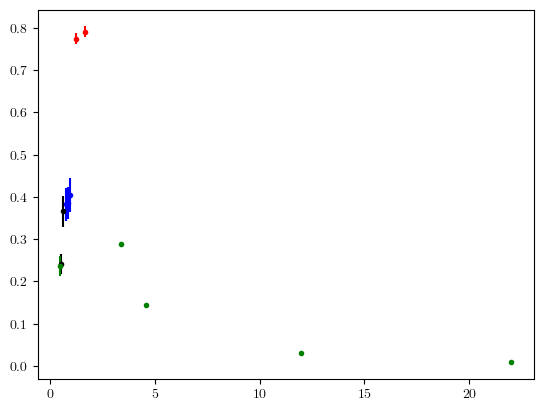

In [148]:
from scipy.optimize import curve_fit
for io in range(len(fin_tab)):
    fig1, ax1 = plt.subplots(1, 1)
    for isl in range(len(sl)):
        sed = np.array([fin_tab[f'F_{nam}'][io].value for nam in wav_nam[sl[isl][0]:sl[isl][1]]])
        e_sed = np.array([fin_tab[f'eF_{nam}'][io].value for nam in wav_nam[sl[isl][0]:sl[isl][1]]])
        e_sed[e_sed > sed] = 0.1*sed[e_sed > sed]
        ax1.errorbar(wav[sl[isl][0]:sl[isl][1]], sed, yerr=e_sed, fmt='.', c=colors[isl], label=cat_nam[isl])
    for ii in range(len(sl)):
        sed = np.array([fin_tab[f'F_{nam}'][io].value for nam in wav_nam])
        popt, pcov = curve_fit(planck, wav, sed)
        ax1.plot(wav, planck(wav, *popt))
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('$\lambda$, $\mu$m')
    ax1.set_ylabel('$F$, Jy')
    ax1.legend()
    fig1.savefig(f'seds/{io:05d}.png', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close(fig=fig1)